In [2]:
import tensorflow as tf
from tensorflow import keras 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Modelo de la señal
Se crea un modelo de una señal describiendola de forma recursiva, condicionado a que r(n) corresponde a ruido gaussiano. 

$$ x(n) =  0.6750 * x(n-1) - 0.8320 * x(n-2) + r(n) $$


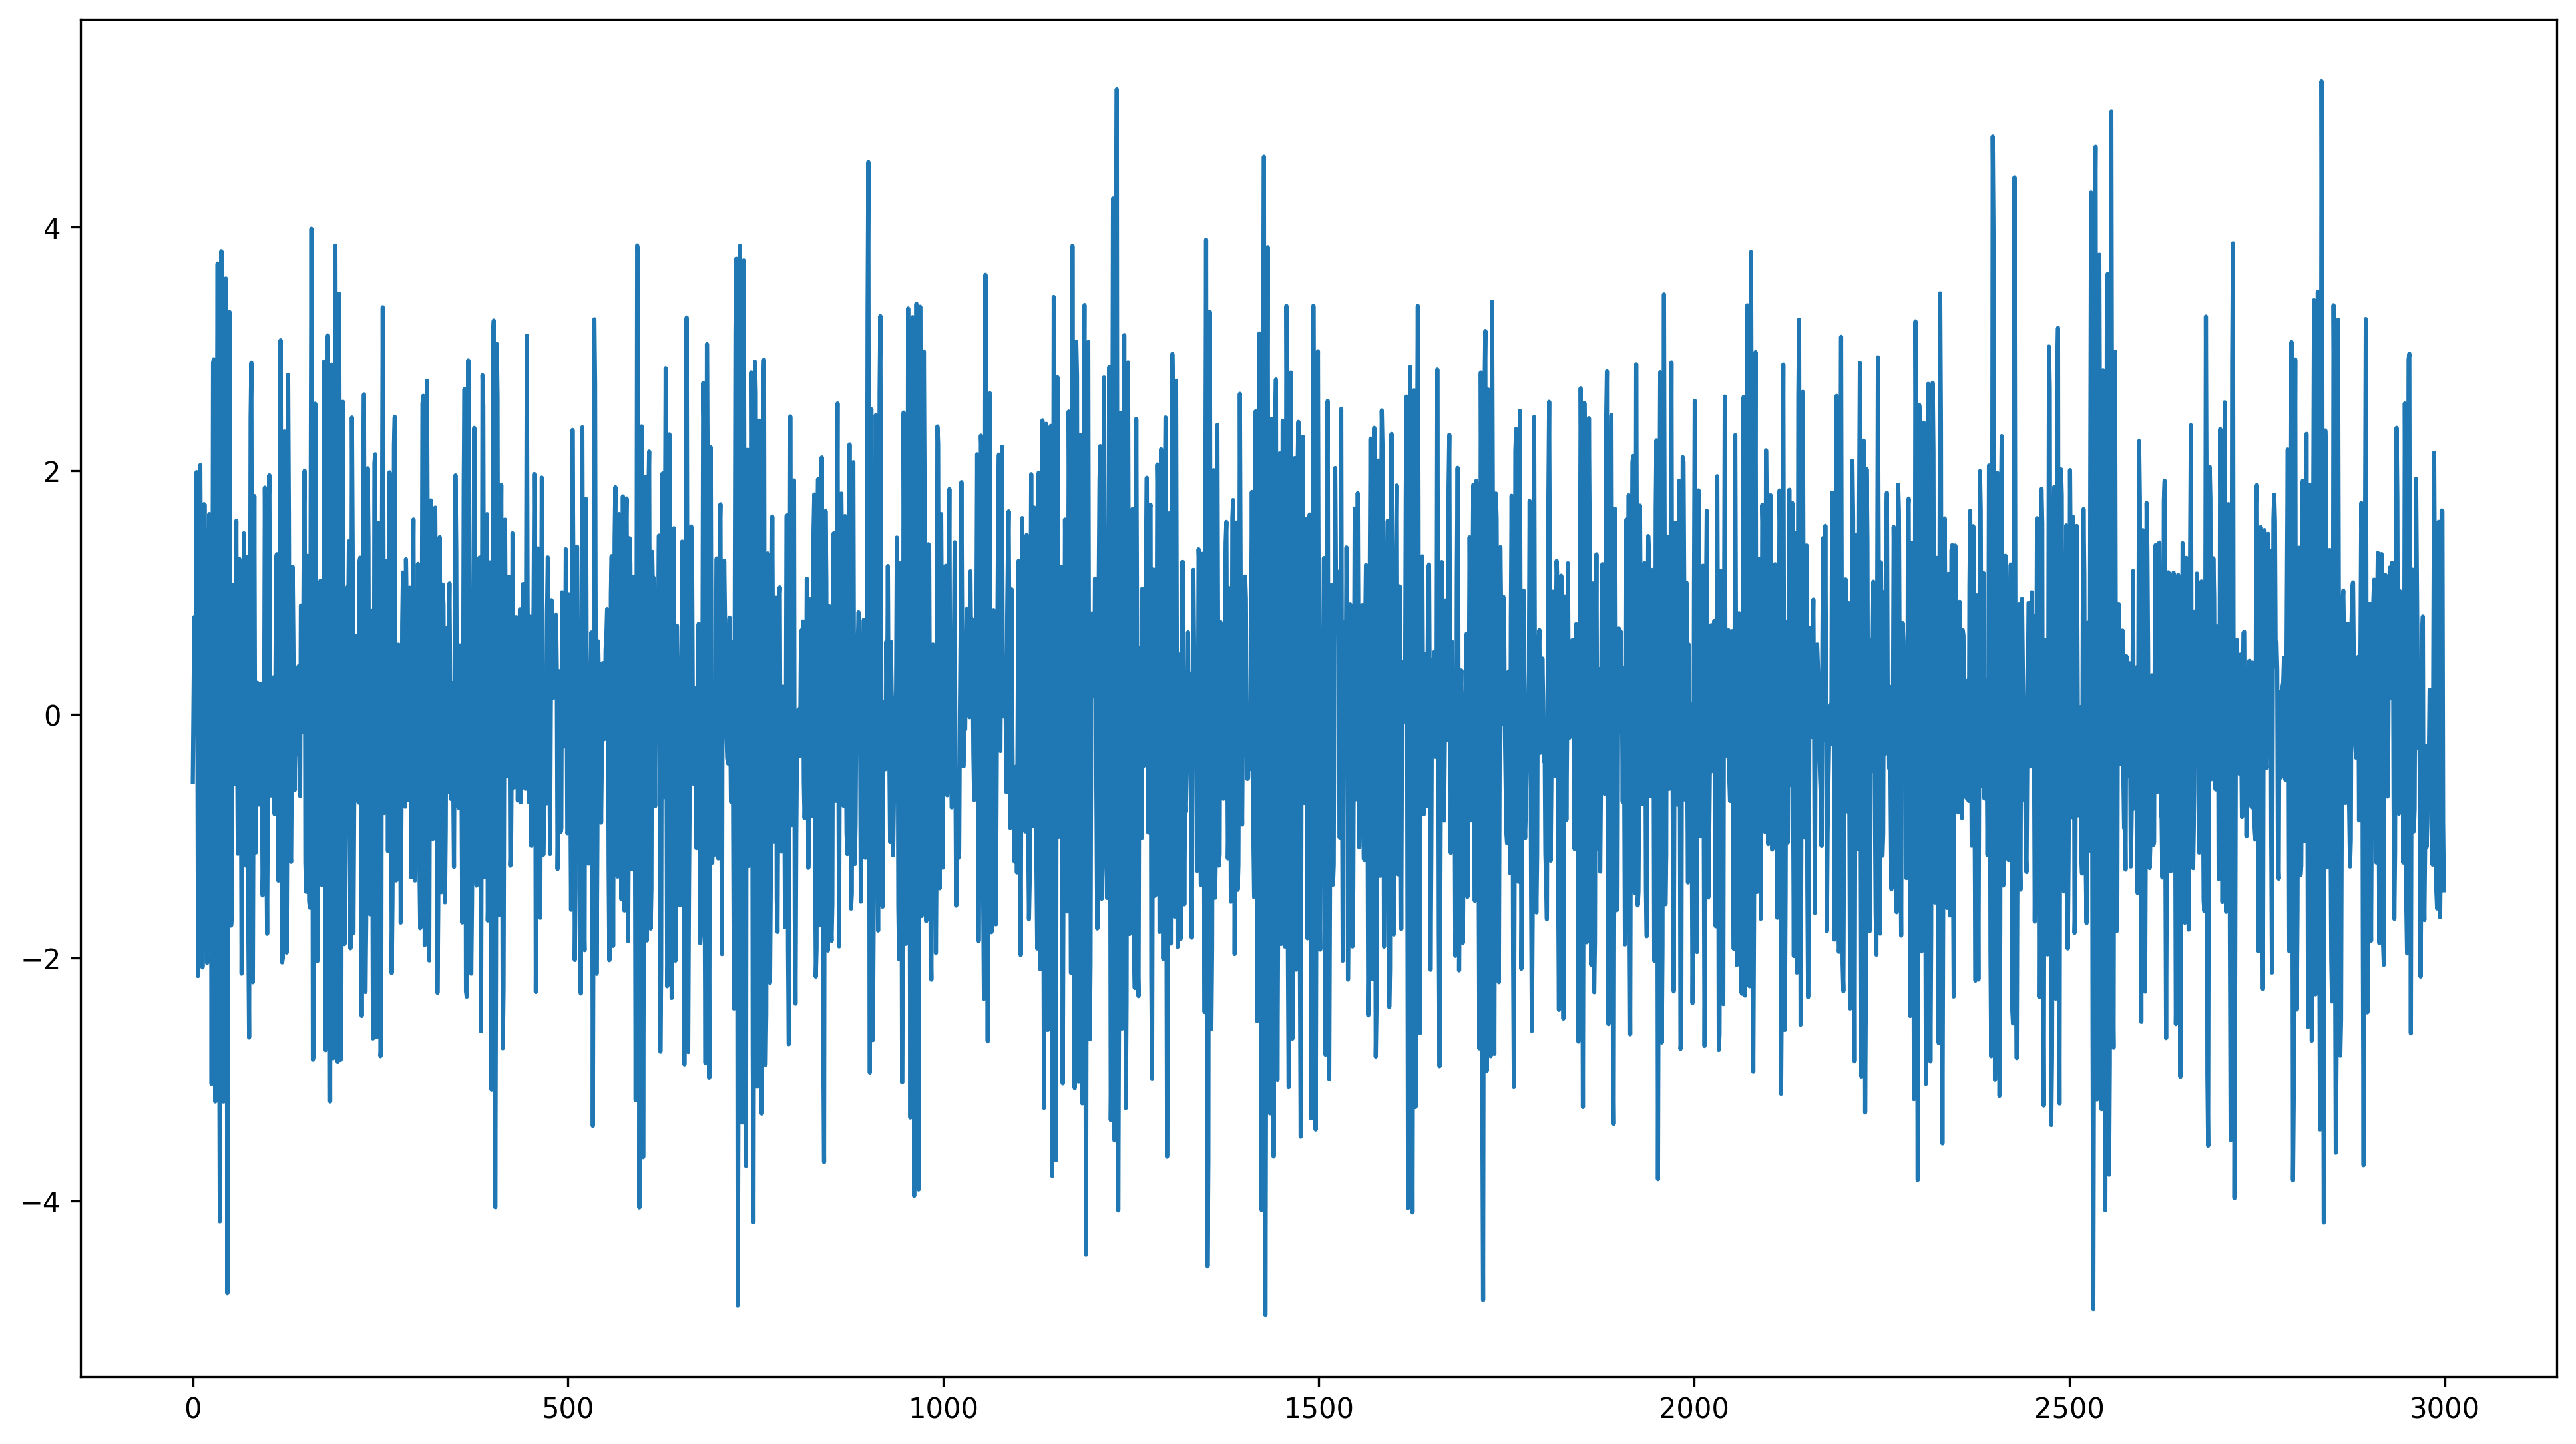

In [145]:
signal = np.zeros(3000) #Si es un escalar la entrada crea un vector
noise = 0.8 * np.random.randn(3000)#Tiene que ser distribución normal
signal[0] = noise[0]
signal[1] =  - 0.8320*signal[0] + noise[1]
for i in range(len(noise)-2):
    signal[i+2] =  0.6750*signal[i+1] - 0.8320*signal[i] + noise[i+2]

fig, ax = plt.subplots(figsize =(16, 9), dpi = 300)
ax.plot(signal)
plt.show()

In [149]:
class filtroLMS():
    
    def __init__(self, n, mu=0.02):
        self.n = n
        self.w = np.random.rand(n)
        self.mu = mu
    
    def train(self, signal):
        e = list()
        for i in range(len(signal)-self.n):
            sample = signal[i:i+self.n]
            error = signal[i+self.n] - np.dot(self.w, sample);
            self.w = self.w + self.mu * sample * error;
            e.append(error)
        plt.plot(e)
        
    def getCoeficients(self):
        return self.w 

Si el receptor desea recuperar los coeficientes que modelan a la señal recibida sería suficiente conocer el número de coeficeintes del modelo y obtener las aproximaciones utilizando filtros adaptativos.

Algunas aplicaciones interesantes puede ser el envío de información oculta dentro de una señal en apariencia aleatoria. 

[-0.81255094  0.69478318]


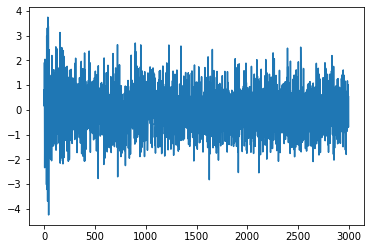

In [152]:
fi_LMS = filtroLMS(2,0.0015)
fi_LMS.train(signal)
print(fi_LMS.getCoeficients())